In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os, sys, time

import h5py
from PIL import Image

import numpy as np
import pylab as plt

from train_epi import load_epi_data

sys.path.append('../..')
from cnn_tools import create_unet, deploy_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
X, Y, (train, valid, test) = load_epi_data()
tile_size = (256, 256)

model = create_unet((1, tile_size[0], tile_size[1]))
model.load_weights('U-Net_weights_epoch0019.hdf5')

print(model)

In [17]:
tic = time.time()
Y_hat = deploy_model(X[test,...], model, stride=128)
print('[info]: total time to deploy model: %0.2f min' % ((time.time() - tic)/60.))

Y_hat = np.argmax(Y_hat, axis=1)

[info]: total time to deploy model: 2.46 min


(12, 1000, 1000) (12, 1000, 1000)


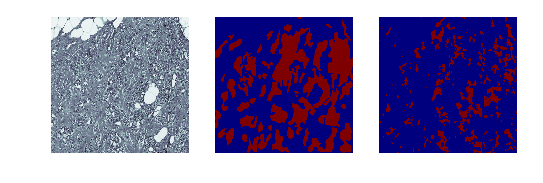

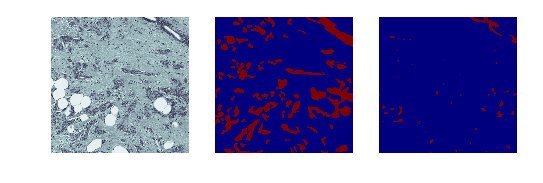

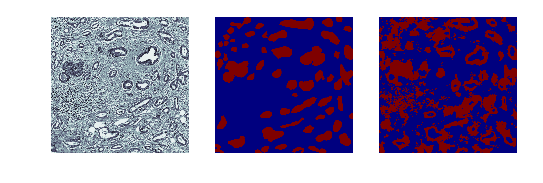

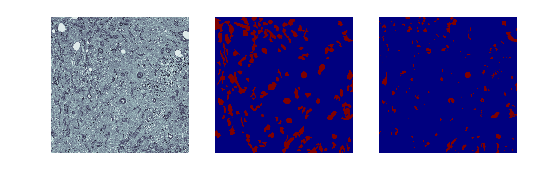

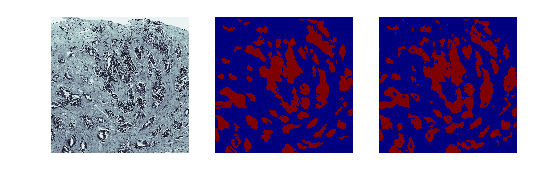

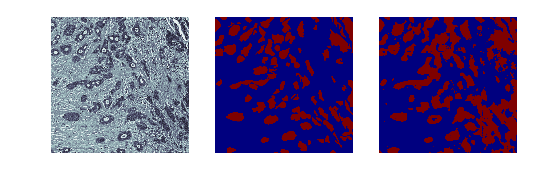

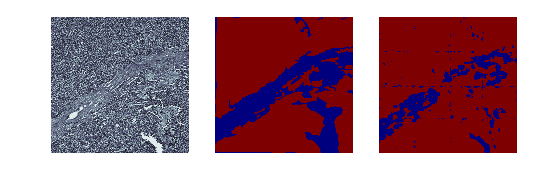

In [30]:
Y_test = np.squeeze(Y[test,...])
X_test = np.squeeze(X[test,...])
print(Y_hat.shape, Y_test.shape)

for ii in range(7):
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(X_test[ii,...], interpolation=None, cmap='bone')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(Y_test[ii,...], interpolation=None)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(Y_hat[ii,...], interpolation=None)
    plt.axis('off')
    
plt.show()